In [ ]:
1 Observations and Insights

In [ ]:
Type Markdown and LaTeX:  𝛼2

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  
1893
249
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female         

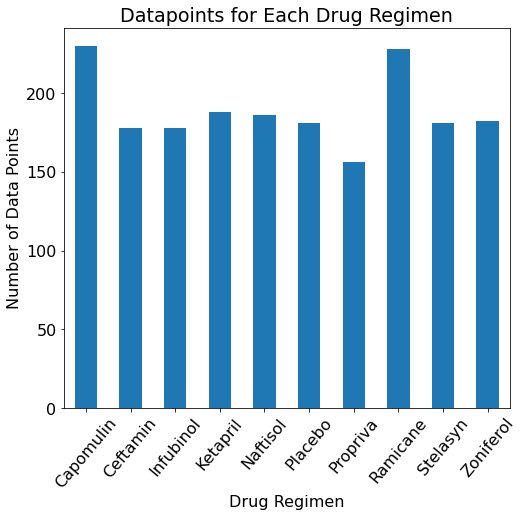

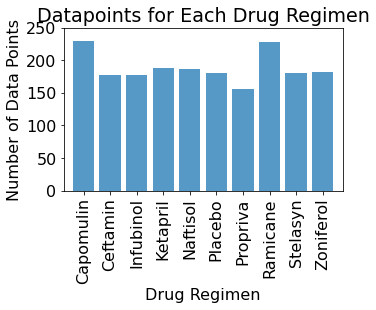

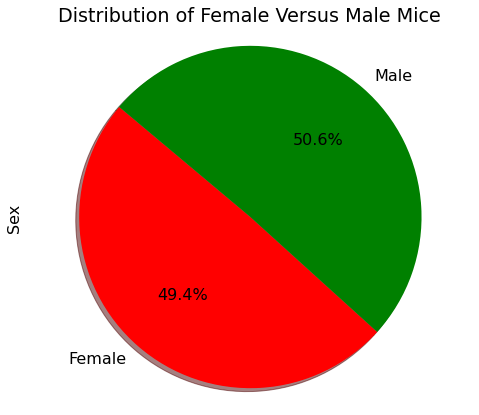

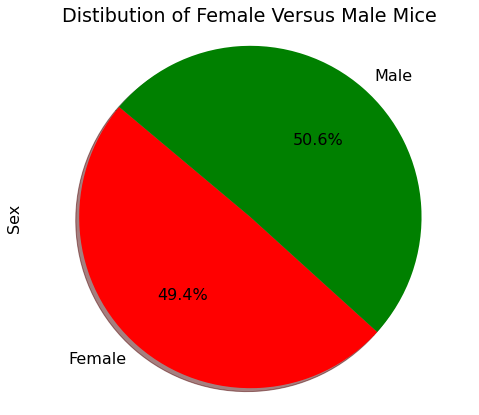

          Timepoint
Mouse ID           
b128             45
b742             45
f966             20
g288             45
g316             45
i557             45
i738             45
j119             45
j246             35
l509             45
l897             45
m601             45
m957             45
r157             15
r554             45
r944             45
s185             45
s710             45
t565             45
u364             45
v923             45
w150             10
w914             45
x401             45
y793             45
    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...     

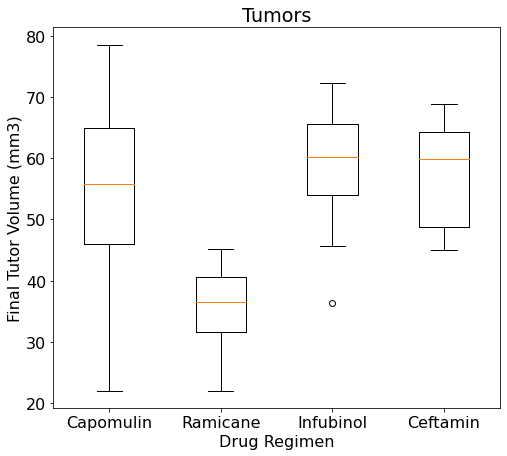

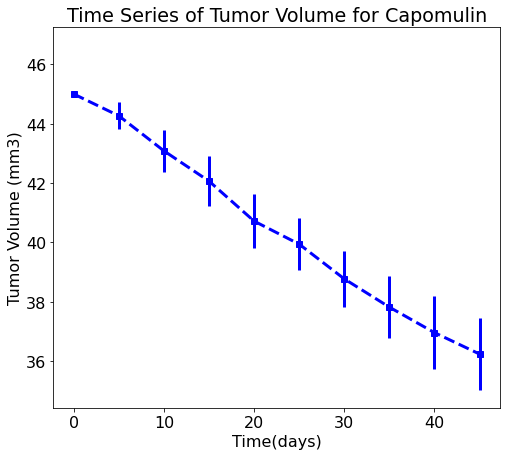

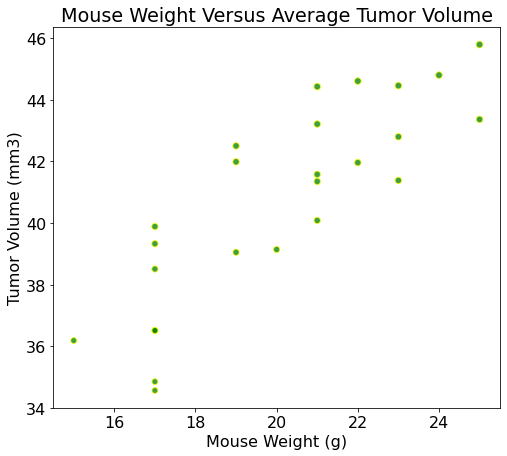

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [214]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"
# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
# Combine the data into a single dataset
merged_df = pd.merge (mouse_metadata_df, study_results_df, how = "left", on=["Mouse ID"])
# Display the data table for preview
print(merged_df.head())
# Check the number of mice.
print (len(merged_df)) 
total_mice = merged_df.groupby('Mouse ID').count()
print(len(total_mice))
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicateRowsDF = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
#mouse_metadata_df.loc[mouse_metadata_df.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
print (duplicateRowsDF)                       
# Drop any duplicate rows
merged_df_no_dups=merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
# Recheck the number of mice
print (merged_df_no_dups.count()) 
total_mice = merged_df_no_dups.groupby('Mouse ID').count()
print(len(total_mice)) 
Tumor_Volume_SEM=('Tumor Volume (mm3)', st.sem)
#0.2  Summary Statistics
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
dfs = merged_df_no_dups.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem']) ["Tumor Volume (mm3)"]
print(dfs)
#'Tumor Volume(mm3)' : 'median',
#'Tumor Volume(mm3)' : 'var',
#'Tumor Volume(mm3)' : 'std',
#'Tumor Volume(mm3)' : 'sem'
# }
#)
#print(dfs)
#summary_df =pd.Dataframe({"Mean" : mean, "Median" : median, "Variance" : var, "Standard Deviation" : std, "SEM" : sem})
#print(summary_df)
#mean = merged_df.groupby('Drug Regimen') ['Tumor Volume(mm3)']
#print(dfs)
#0.3  Bar and Pie Charts
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
#grouped_df = pd.Dataframe(merged_df_no_dups.groupby(["Drug Regimen"]).count()).reset_index()
datapoints=merged_df_no_dups.groupby('Drug Regimen').count() ['Tumor Volume (mm3)']
barplot = pd.DataFrame(datapoints)
also = barplot.plot.bar(legend=False,rot=50)
also
plt.ylabel("Number of Data Points")
plt.title("Datapoints for Each Drug Regimen")
plt.savefig('barplot1')
#plt.show(barplot)
#plt.clf()

# Generate identical bar plot using pyplot instead of pandas.
#import matplotlib.pyplot as plt
drug_regimens = dfs.index.tolist()
print(drug_regimens)
#a.empty()
x_axis = np.arange(len(datapoints))
tick_locations = [x for x in x_axis]
#barplot2 = pd.DataFrame(datapoints)
plt.figure(figsize=(5,3))
barplot2=barplot.reset_index()
barplot2
plt.bar(x_axis, barplot2['Tumor Volume (mm3)'], alpha = 0.75, align="center")
plt.xticks(tick_locations, barplot2['Drug Regimen'],rotation="vertical")
plt.xlim(-0.75, len(datapoints)-.25)
plt.ylim(0,250)
plt.title("Datapoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
#Text(0,0.5, 'Number of Data Points')
plt.savefig('barplot2')
#plt.show(barplot2)
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = merged_df.groupby('Sex')
gender_df_count = pd.DataFrame(gender_df['Sex'].count())
gender_df_count.head()
gender_df_count.plot(kind='pie', y='Sex', \
                                                title="Distribution of Female Versus Male Mice", startangle=140, \
                                                                                                                    autopct=
                    '%1.1f%%', shadow=True, fontsize=16, colors=["red", "green"], legend=False)
plt.axis("equal")
plt.show()
# Generate identical pie plot using pyplot
genders = list(gender_df_count.index.values)
gender_counts = gender_df_count['Sex']
colors = ["red", "green"]
plt.pie(gender_counts, labels=genders, colors=colors,
                                         autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distibution of Female Versus Male Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()
#0.4  Quartiles, Outliers and Boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
merged_df.head()
#new_df = merged_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
#max_df = new_df.loc[new_df["Timepoint"]==45]
#max_df.head().reset_index()
#capomulin_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
#capomulin_data_df.head().reset_index()

pdlast = merged_df_no_dups.groupby('Mouse ID').max()['Timepoint']
#capomulinlastvol=pd.DataFrame(capomulinlast)

print(capomulinlastvol)
pdlastmerge = pd.merge(pdlast, merged_df_no_dups, on=("Mouse ID", "Timepoint"), how="left")

print(pdlastmerge)

pdlastbyRegimen = pdlastmerge.groupby('Drug Regimen')

print (pdlastbyRegimen)

#capomulinlastmerge.head(5)
#ramicanelastmerge.head(5)

# Capomulin, Ramicane, Infubinol, and Ceftamin
# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
#cap_df = merged_df.loc[merged_df["Drug Regimen"]=="Capomulin",:]
tumors = pdlastmerge["Tumor Volume (mm3)"]
quartiles = tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(lowerq)
print(upperq)
print(iqr)
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
# One method to do this is the following, but you can use whatever method works for you.
##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr) 
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)
#capomulinlastvolume= pdlastmerge["Capomulin"]
#quartiles = capomulinlastvolume.quantile([0.25,0.5,0.75])
#lowerq2 = quartiles[0.25]
#upperq2 = quartiles[0.75]
#iqr2 = upperq - lowerq
#print(lowerq2)
#print(upperq2)
#print(iqr2)
print(f"Capomulin potential outliers are values below {lower_bound} and values above {upper_bound}.")
ram_df = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane",:]
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, merged_df, on=("Mouse ID", "Timepoint"), how = "left")
ramlastmerge.head(10)
tumors2 = ramlastmerge["Tumor Volume (mm3)"]
quartiles2 = tumors2.quantile([0.25,0.5,0.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2 - lowerq2
print(lowerq2)
print(upperq2)
print(iqr2)
lower_bound2 = lowerq2 - (1.5*iqr2) 
upper_bound2 = upperq2 + (1.5*iqr2)
print(lower_bound2)
print(upper_bound2)
print(f"Ramicane potential outliers are values below{lower_bound2} and values above {upper_bound2}.")
inf_df = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol",:]
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, merged_df, on=("Mouse ID", "Timepoint"), how="left")
inflastmerge.head(10)
tumors3 = inflastmerge["Tumor Volume (mm3)"]
quartiles3 = tumors3.quantile([0.25,0.5,0.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3 - lowerq3
print(lowerq3)
print(upperq3)
print(iqr3)
lower_bound3 = lowerq3 - (1.5*iqr3) 
upper_bound3 = upperq3 + (1.5*iqr3)
print(lower_bound3)
print(upper_bound3)
print(f"Infubinol potential outliers are values below{lower_bound3} and values above {upper_bound3}.")
ceft_df = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin",:]
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, merged_df, on=("Mouse ID", "Timepoint"), how="left")
ceftlastmerge.head(10)
tumors4 = ceftlastmerge["Tumor Volume (mm3)"]
quartiles4 = tumors4.quantile([0.25,0.5,0.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4 - lowerq4
print(lowerq4)
print(upperq4)
print(iqr4)
lower_bound4 = lowerq4 - (1.5*iqr4) 
upper_bound4 = upperq4 + (1.5*iqr4)
print(lower_bound4)
print(upper_bound4)
print(f"Ceftamin potential outliers are values below{lower_bound4} and values above {upper_bound4}.")
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
data_for_plot = [tumors, tumors2, tumors3, tumors4]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tutor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_for_plot, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin",])
plt.show()
#0.5  Line and Scatter Plots
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
capomulin_data = merged_df_no_dups.loc[merged_df_no_dups['Drug Regimen']=='Capomulin']
capomulin_data.head()
#Tumor_Volume_SEM=('Tumor Volume (mm3)', st.sem)
cap_timepoint_tumor = capomulin_data.groupby(['Timepoint']).agg(\
                            Tumor_Volume_Mean=('Tumor Volume (mm3)', np.mean),\
                            Tumor_Volume_Sem=('Tumor Volume (mm3)', st.sem)\
                                            )
cap_timepoint_tumor.head(10)
time_series = list(cap_timepoint_tumor.index.values)
plt.errorbar(
    time_series,
    cap_timepoint_tumor['Tumor_Volume_Mean'],
    yerr=cap_timepoint_tumor['Tumor_Volume_Sem'],
    label="Time Series of Tumor Volume for Capomulin",
    fmt="bs--",
    linewidth=3
    )
plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(min(time_series)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(cap_timepoint_tumor['Tumor_Volume_Mean']) * 0.95, max(cap_timepoint_tumor['Tumor_Volume_Mean']) *1.05)
plt.rcParams["figure.figsize"] = [8,7]
plt.show()
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
capomulin_data.head()
capomulin_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
                                              Mouse_Weight = ('Weight (g)', np.mean),\
                                              Tumor_Volume_Mean = ('Tumor Volume (mm3)', np.mean)\
).round(3)
capomulin_mouse_id.head(25)
plt.scatter(
    capomulin_mouse_id['Mouse_Weight'],
    capomulin_mouse_id['Tumor_Volume_Mean'],
    marker='o',
    facecolors='green',
    edgecolors='yellow',
    s=capomulin_mouse_id['Tumor_Volume_Mean'],
    alpha = 0.75)
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
#0.6  Correlation and Regression
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"]) ["Tumor Volume (mm3)"].
mean()).reset_index()
average_cap.head()
mouse_weight = average_cap.iloc[:,0]
average_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")